In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import signal

In [2]:
DX = 0.001
MU = 0
SIG = 1
MINV = -5
MAXV = 10

#Defining function to shift an array by an arbitrary amount using a convolution
def shift(arr,s):
    N = len(arr) #Length of the gaussian passed in
    kvec = np.arange(N)
    yft = np.fft.fft(arr)
    J = np.complex(0,1)
    
    #Considering the shift value s in the phase
    yft_new = yft*np.exp(-2*np.pi*J*s*kvec/N)
    #Getting the inverse ft with the s included now
    y_new = np.real(np.fft.ifft(yft_new))
    
    return y_new
    
#Defining a gaussian function to shift
def gauss(x,mu,sig):
    return (np.exp(-(x-mu)**2/(2*sig**2)))

#Defining correlation function
def correlation(f,g):
    a = np.fft.fft(f)*np.conj(np.fft.fft(g[::-1]))
    b = np.fft.ifft(a)
    return b.real/(max(b.real))

#Making the gaussian array
x_val = np.arange(MINV,MAXV,DX)
g = gauss(x_val,MU,SIG)
#Defining the shift
s = 2/DX
#Getting the shifted gaussian values
g_s = shift(g,s)

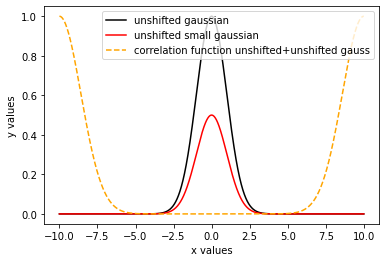

In [3]:
x_val = np.arange(-10,10,DX)
g = gauss(x_val,MU,SIG)

corr_unshift_unshift = correlation(g,g*0.5)

plt.plot(x_val,g,color='black',label='unshifted gaussian')
plt.plot(x_val,g*0.5,color='red',label='unshifted small gaussian')

plt.plot(x_val,corr_unshift_unshift,'--',color='orange',label='correlation function unshifted+unshifted gauss')

plt.xlabel('x values')
plt.ylabel('y values')
plt.savefig('q2_gauss_correlation')
plt.legend(loc='upper right')
plt.show()

The most overlap happens at the ends, seen in orange

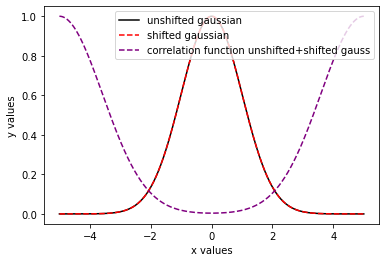

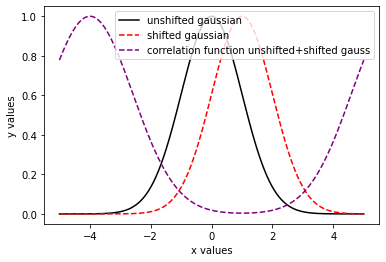

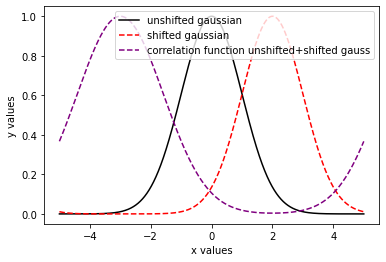

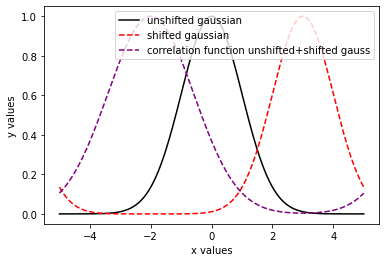

In [6]:
x_val = np.arange(-5,5,DX)
g = gauss(x_val,MU,SIG)
#Defining the shift
#s = 0/DX
shiftarr = [0,1/DX,2/DX,3/DX]
for s in shiftarr:
    g_s = shift(g,s)

    #Getting the correlation function of gaussian and a shifted gaussian
    corr_shift_shift = correlation(g_s,g_s)
    corr_unshift_shift = correlation(g,g_s)

    #Plot the results
    plt.plot(x_val,g,color='black',label='unshifted gaussian')
    plt.plot(x_val,g_s,'--',color='red',label='shifted gaussian')
    plt.plot(x_val,corr_unshift_shift,'--',color='purple',label='correlation function unshifted+shifted gauss')

    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.savefig('q2_gauss_correlation_2')
    plt.legend(loc='upper right')
    plt.show()

The correlation function does depend on the shift of the gaussian. In each plot above, the gaussian is shifted to the right more each time, and we see the correlation function behave in a similar way. The correlation function 'follows' the shifted gaussian. This does not suprise me because the overlapping area shifts.